In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [7]:
df = pd.read_csv('smash_v1.csv')

# Removing type_of_shot (they're all the same)
df = df.drop('type_of_shot', axis = 1)

df.head()

,id,frame_count,kpt_0_x,kpt_0_y,kpt_1_x,kpt_1_y,kpt_2_x,kpt_2_y,kpt_3_x,kpt_3_y,...,kpt_12_x,kpt_12_y,kpt_13_x,kpt_13_y,kpt_14_x,kpt_14_y,kpt_15_x,kpt_15_y,kpt_16_x,kpt_16_y
0,101,0,0.0,0.0,0.0,0.0,0.0,0.0,687.996460,262.951782,...,815.209229,396.171082,757.796814,508.305786,787.642578,469.871643,776.365906,615.642883,824.935242,551.207275
1,101,1,0.0,0.0,0.0,0.0,0.0,0.0,691.630188,274.037262,...,815.347778,404.147430,761.215027,518.545471,791.998474,475.096252,784.513000,624.796265,835.347778,552.185242
2,101,2,0.0,0.0,0.0,0.0,0.0,0.0,694.214355,282.918457,...,818.231995,417.666260,758.630005,530.391785,792.194336,486.224915,796.893921,634.304871,846.007263,564.999878
3,101,3,0.0,0.0,0.0,0.0,0.0,0.0,696.827820,296.562622,...,818.831787,429.363342,752.453308,540.809692,793.435059,493.834106,799.393860,634.709961,851.539612,566.061462
4,101,4,0.0,0.0,0.0,0.0,0.0,0.0,700.760315,308.873901,...,824.773682,445.019165,740.424377,543.479431,793.883667,498.106964,796.599182,630.698975,851.529419,566.537598


/var/folders/d1/2s6wmgwj39b_bcrm9kmlwqsr0000gn/T/ipykernel_18789/2296672362.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6,8))


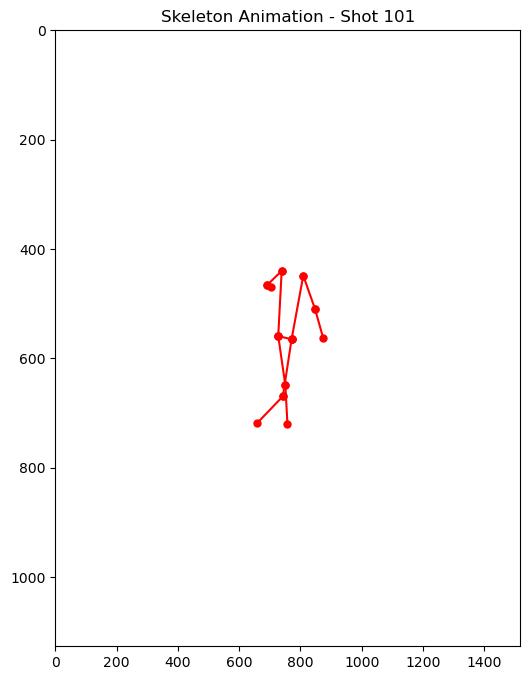

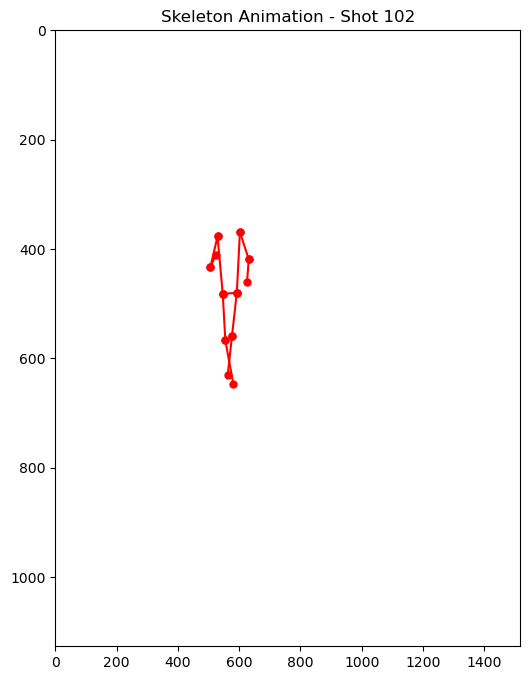

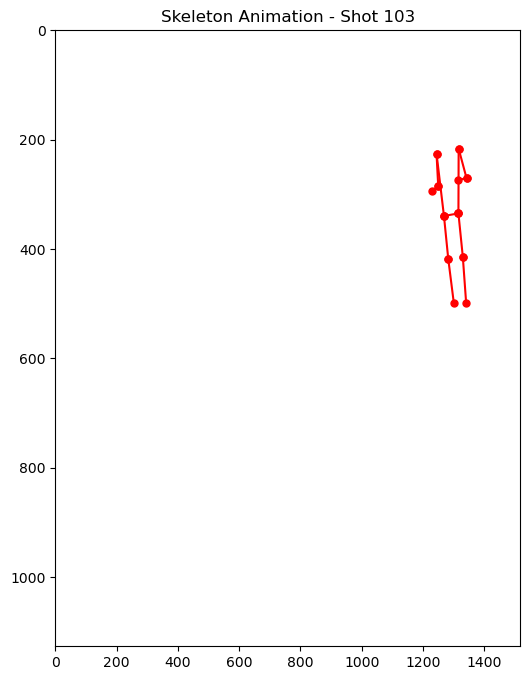

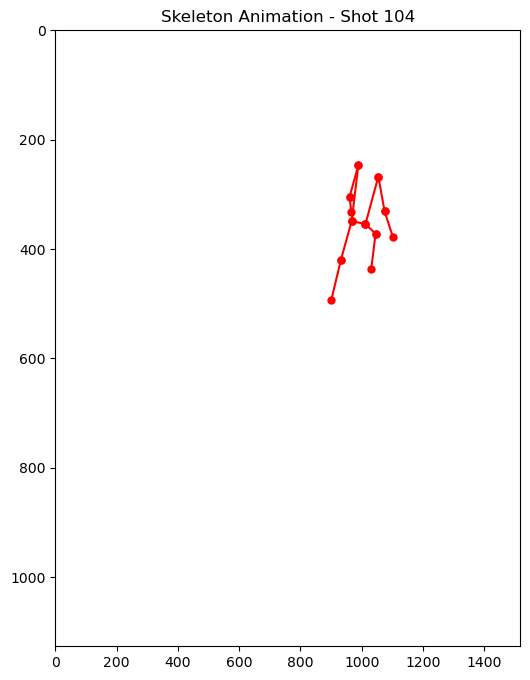

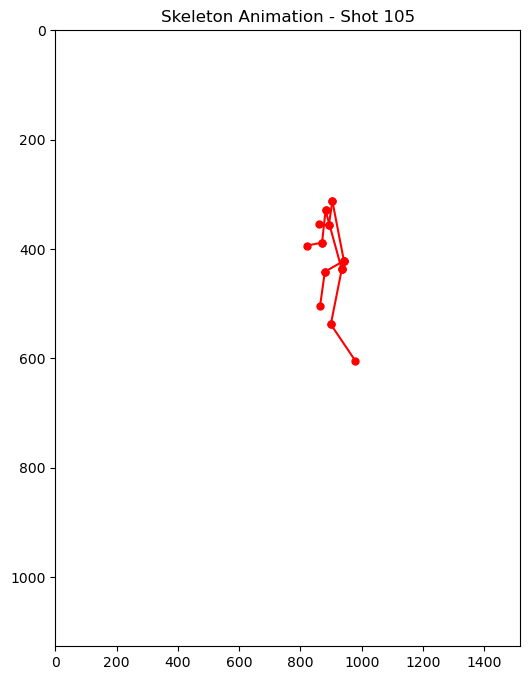

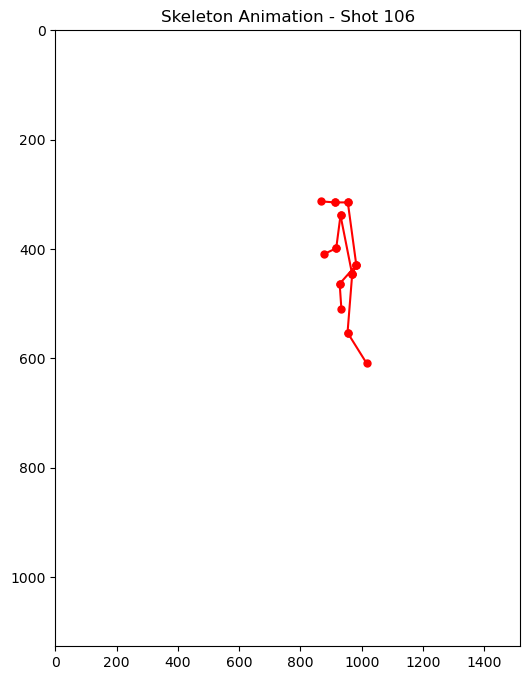

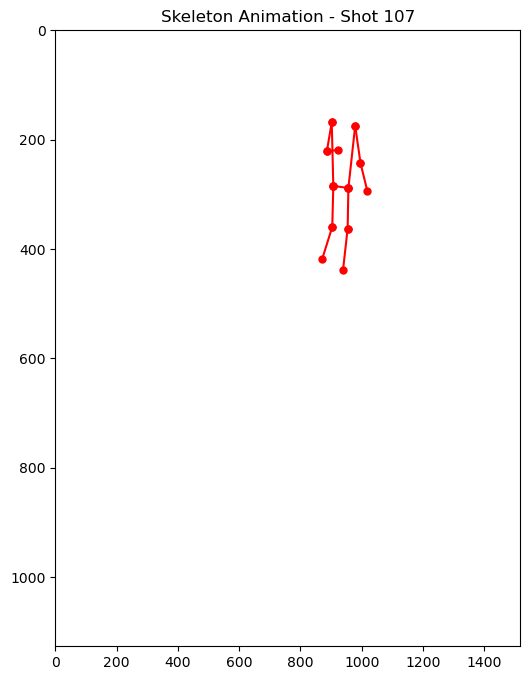

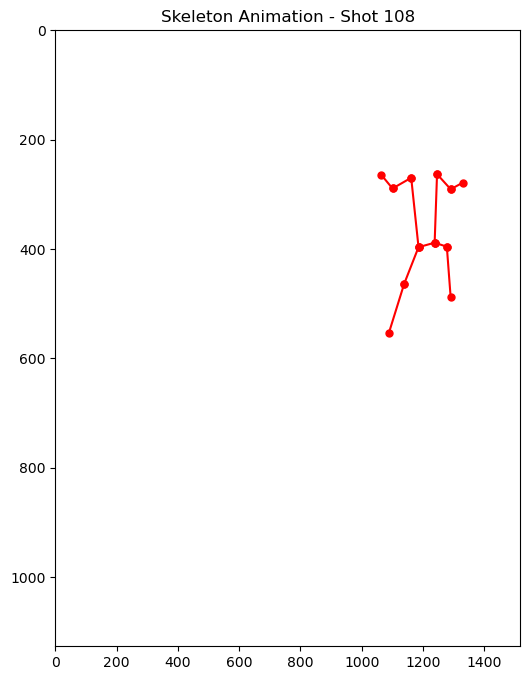

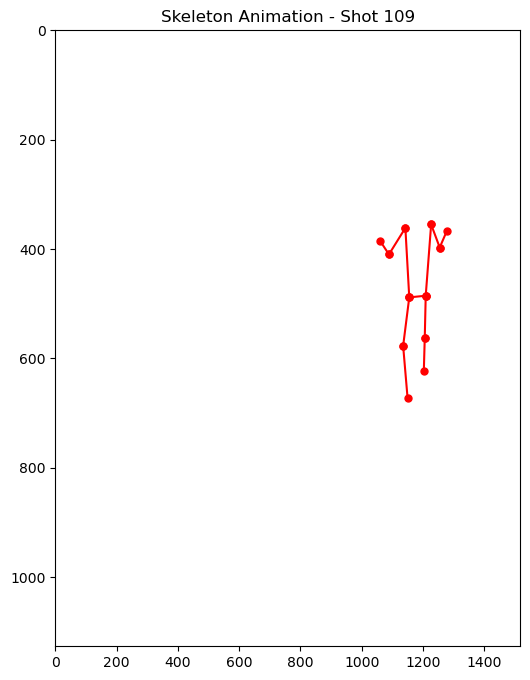

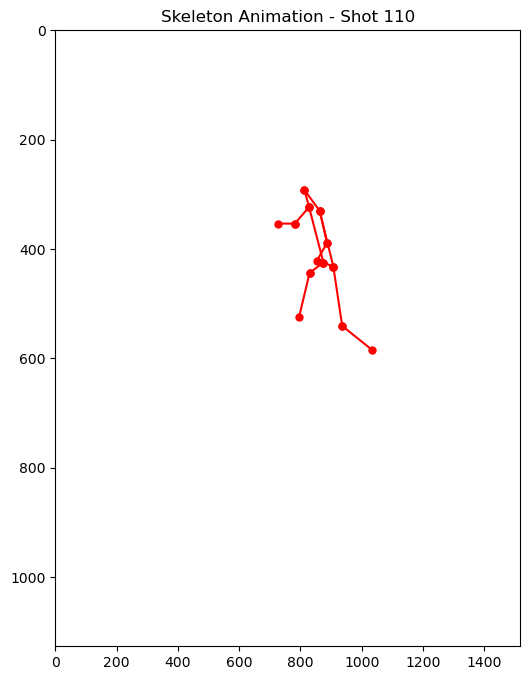

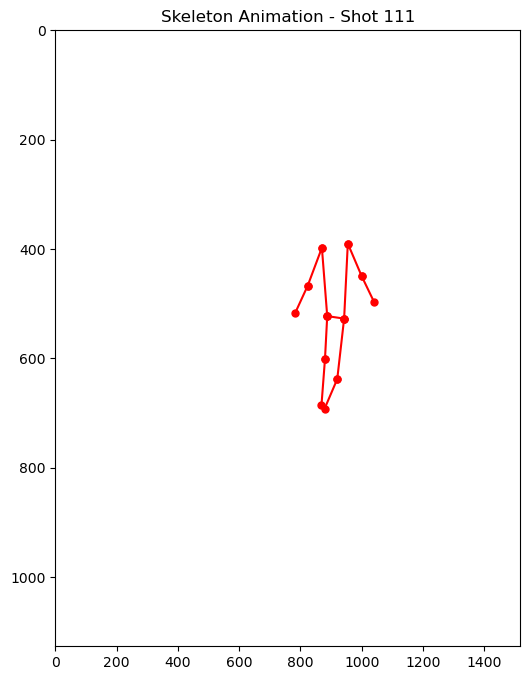

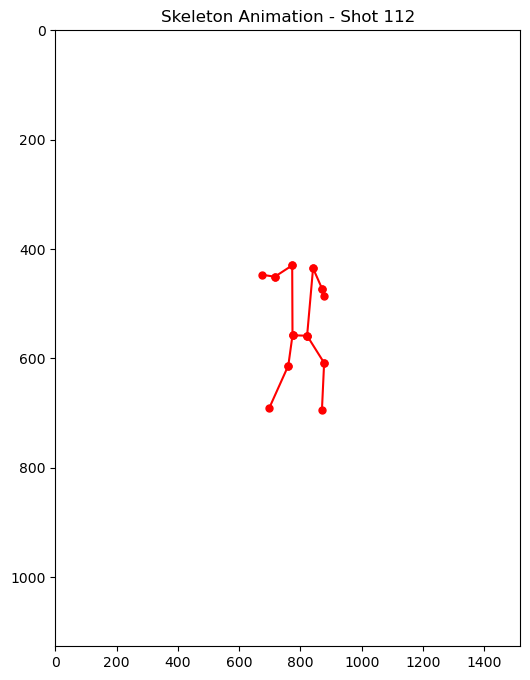

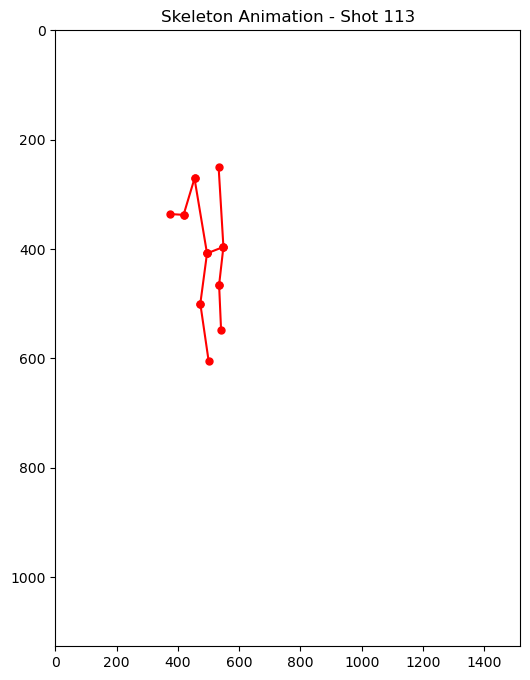

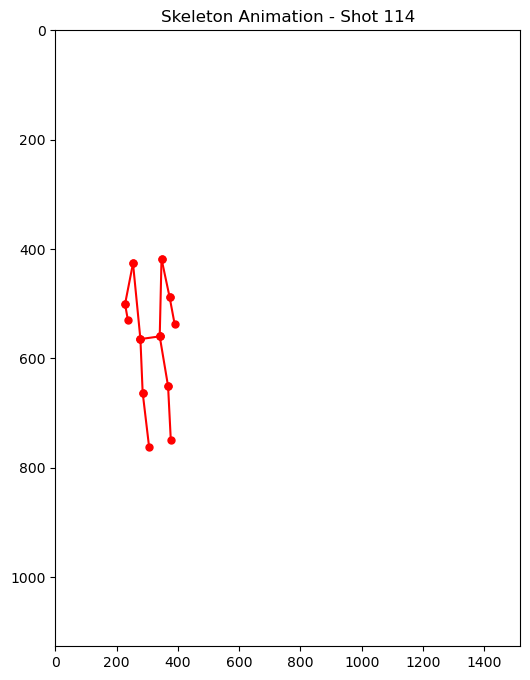

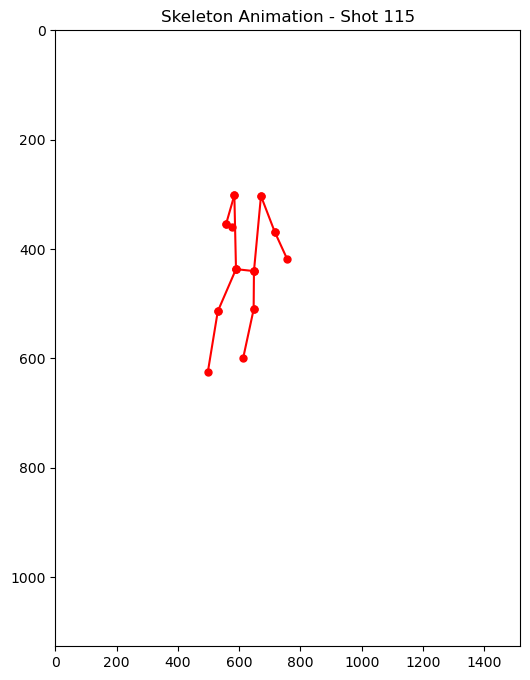

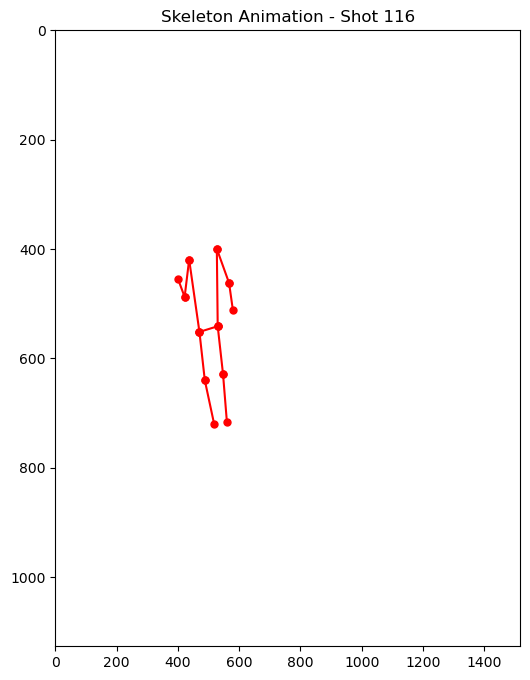

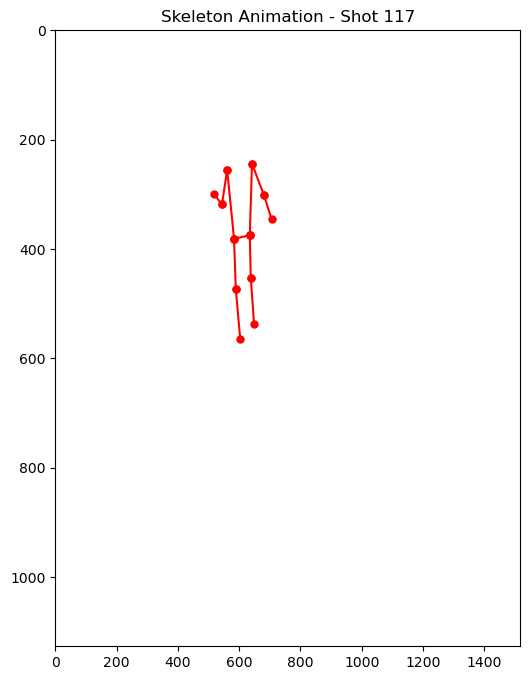

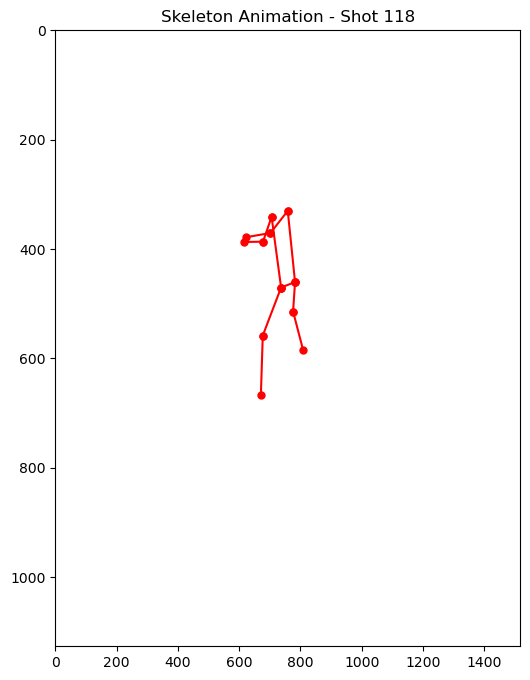

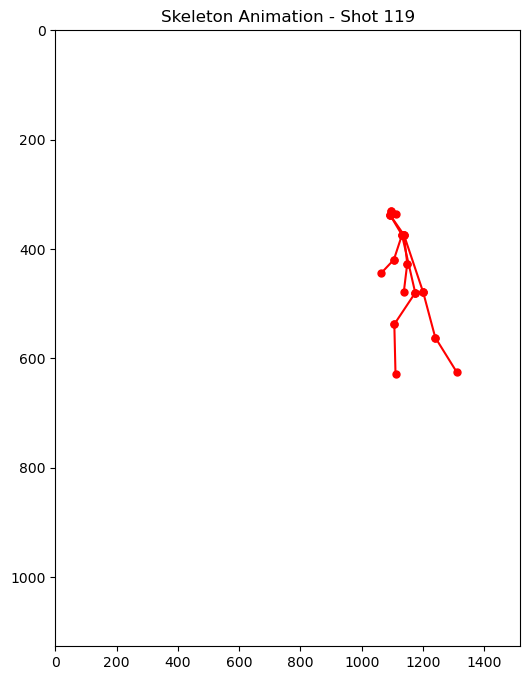

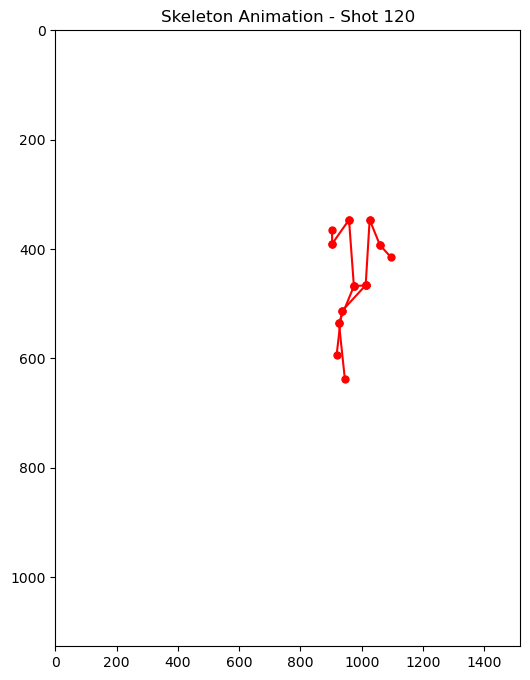

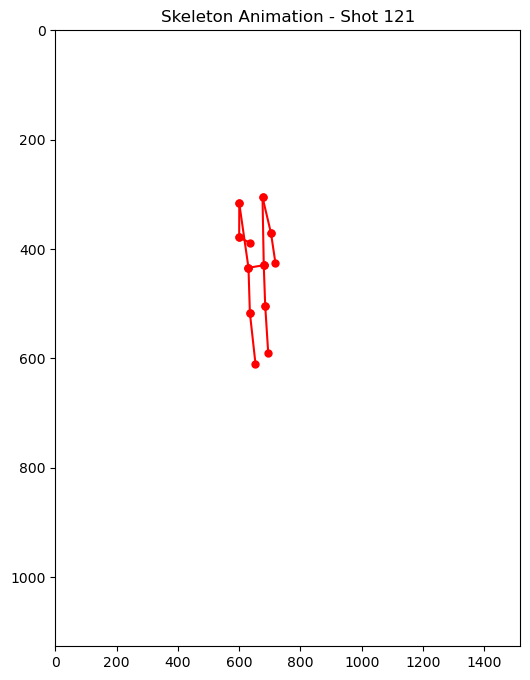

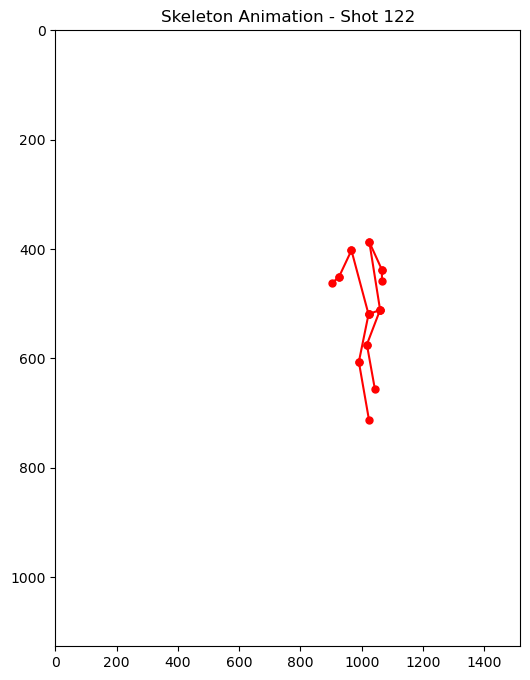

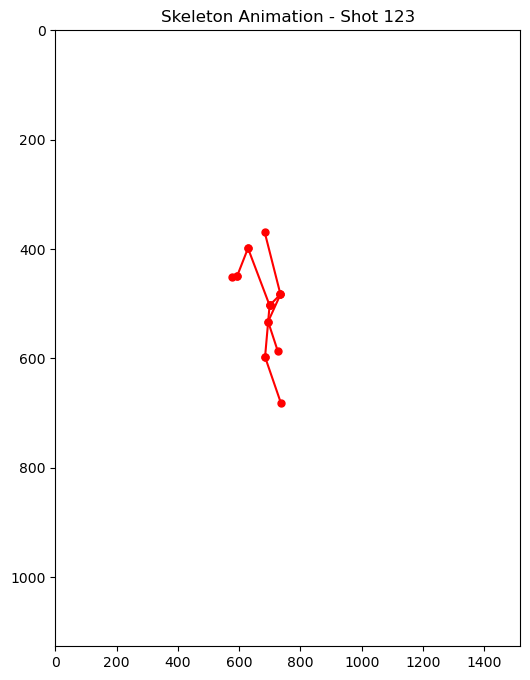

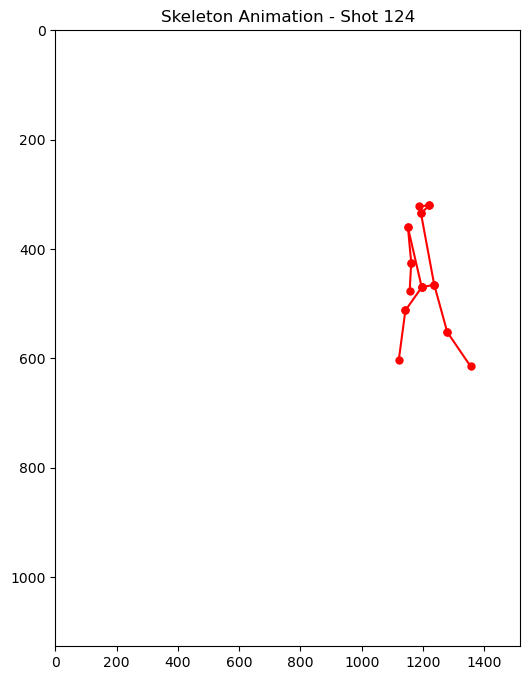

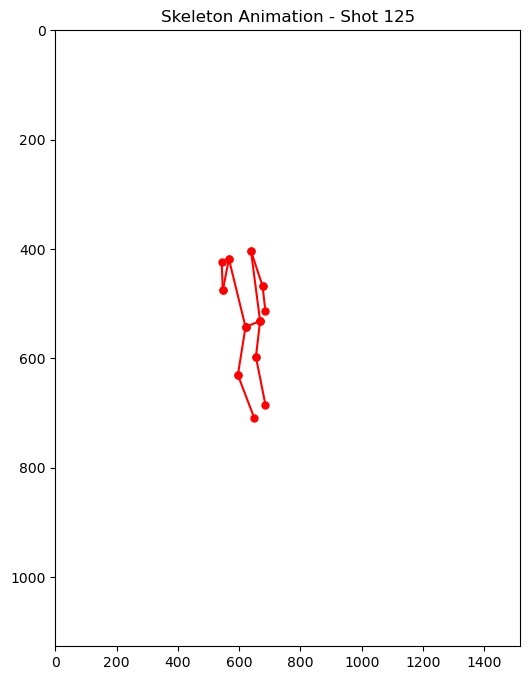

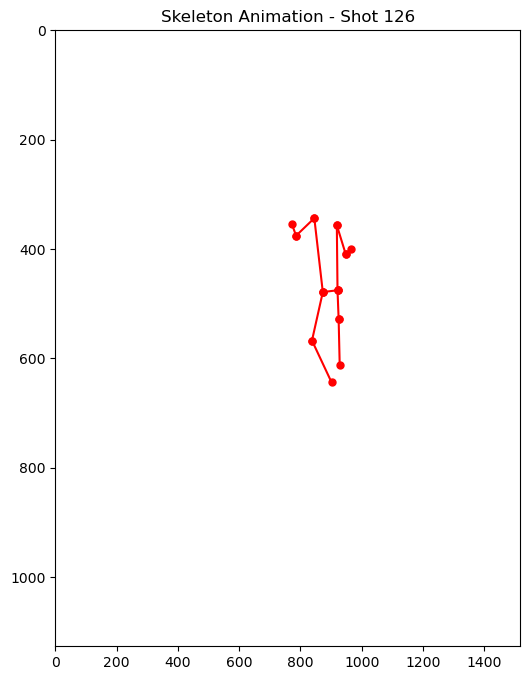

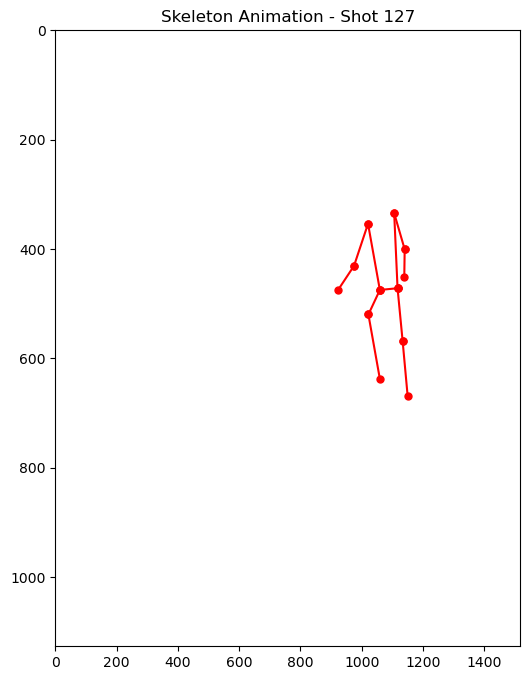

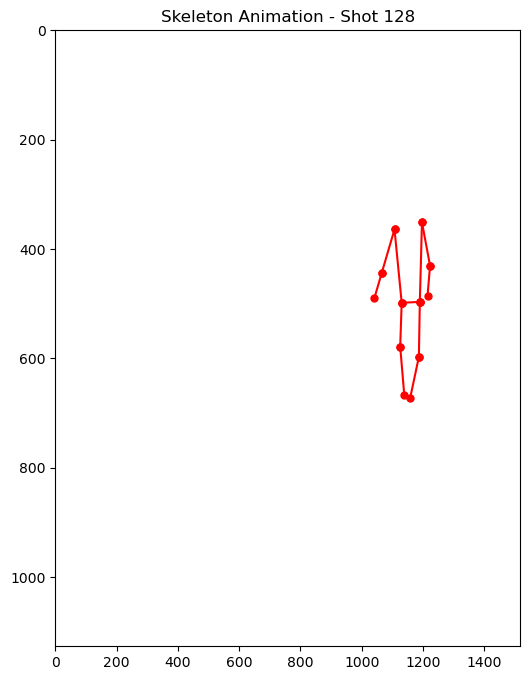

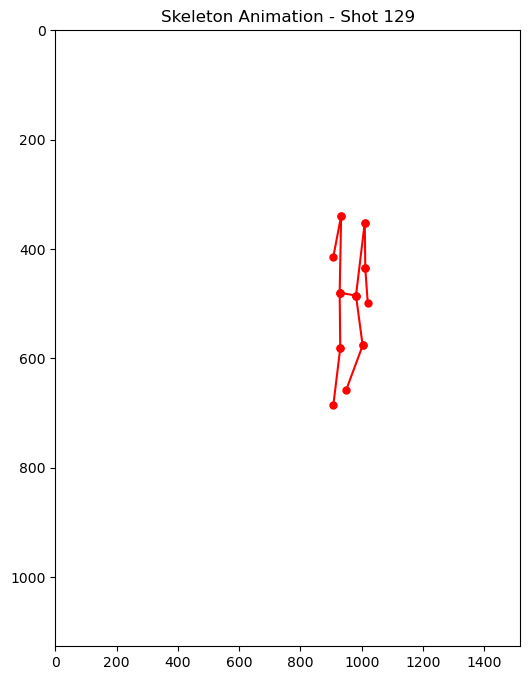

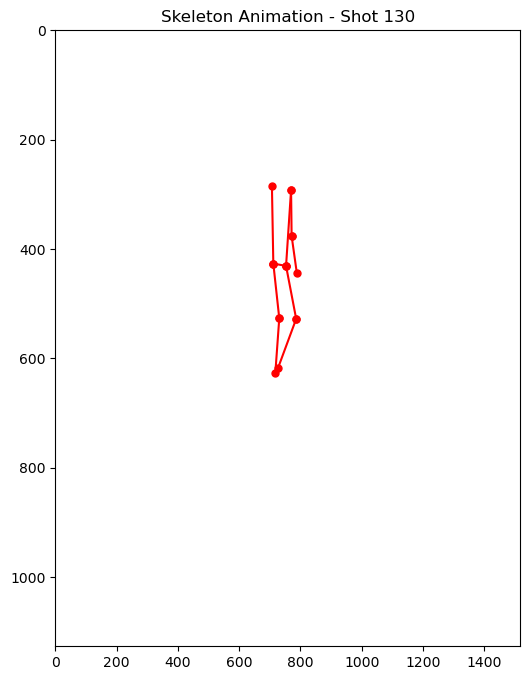

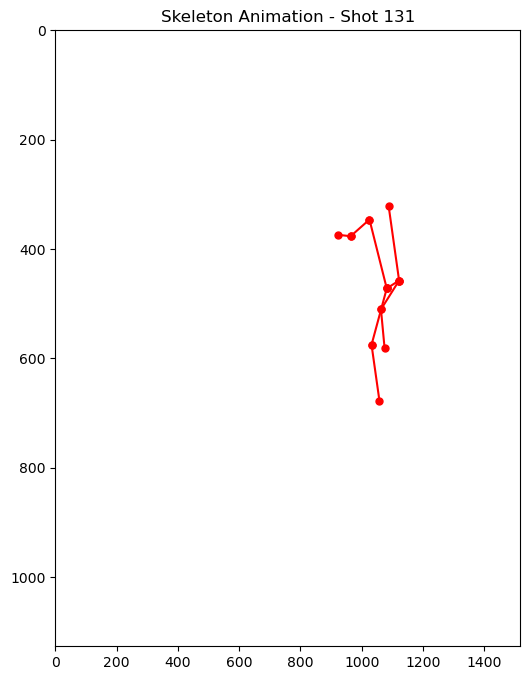

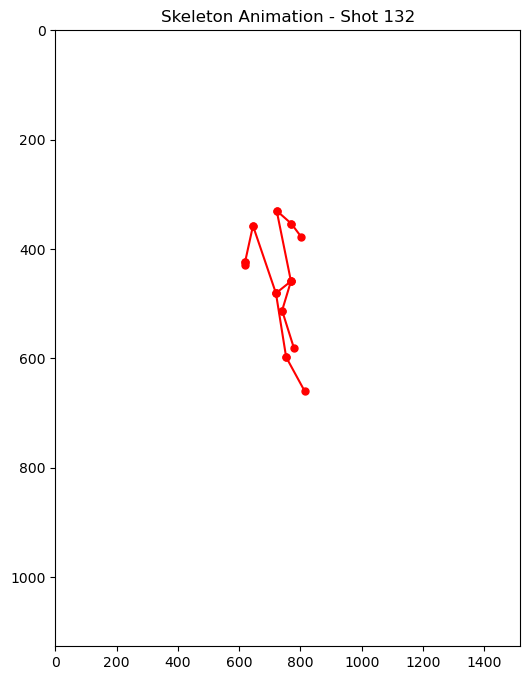

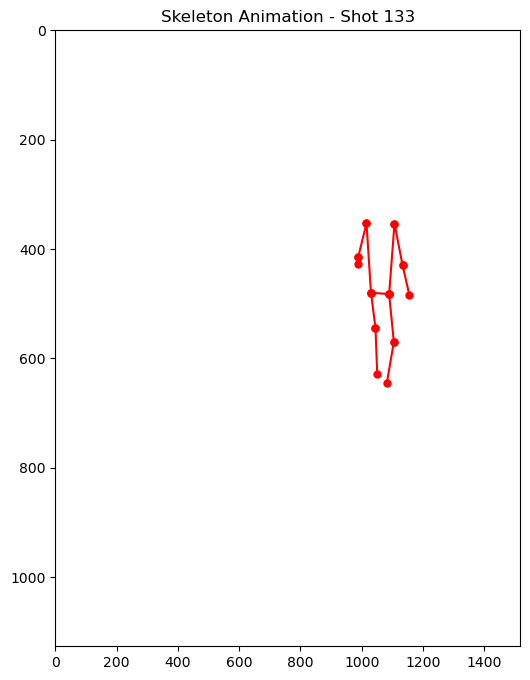

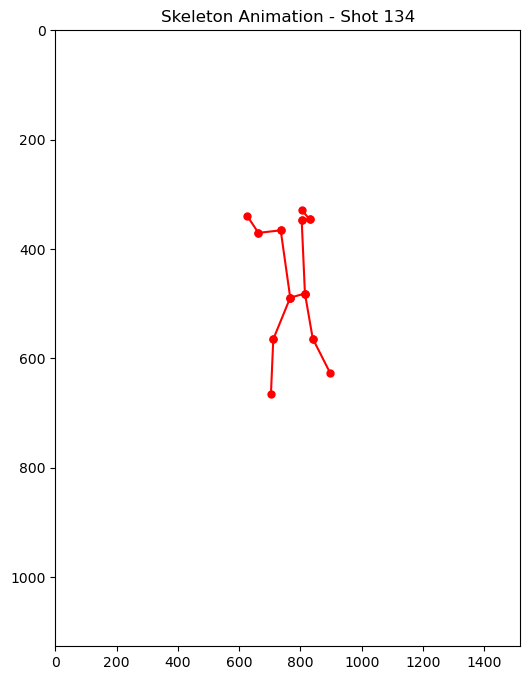

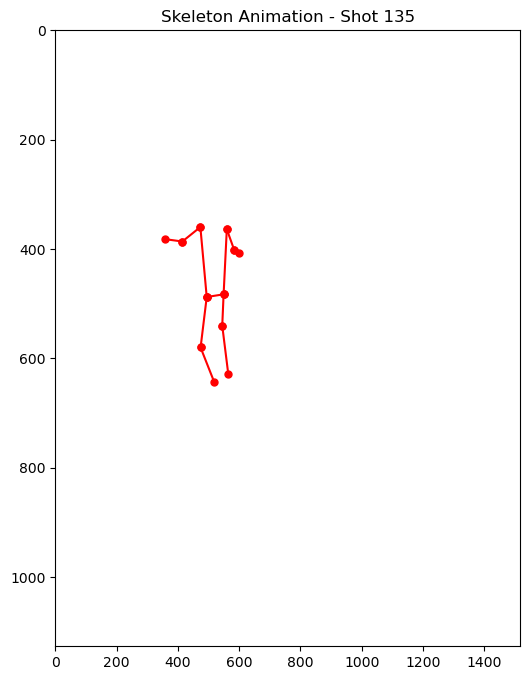

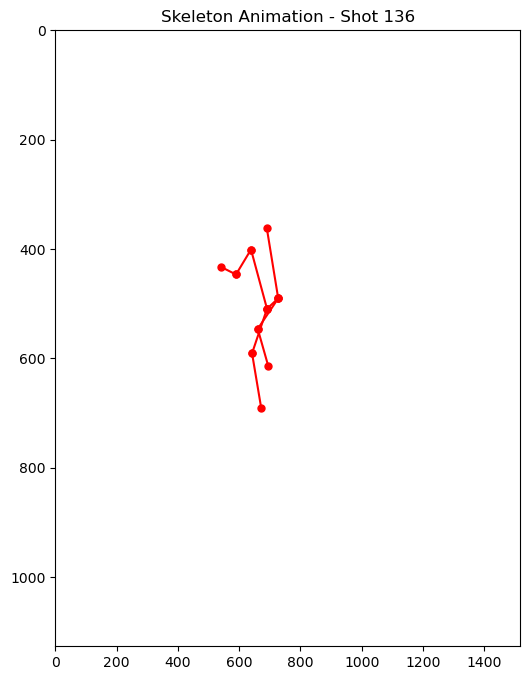

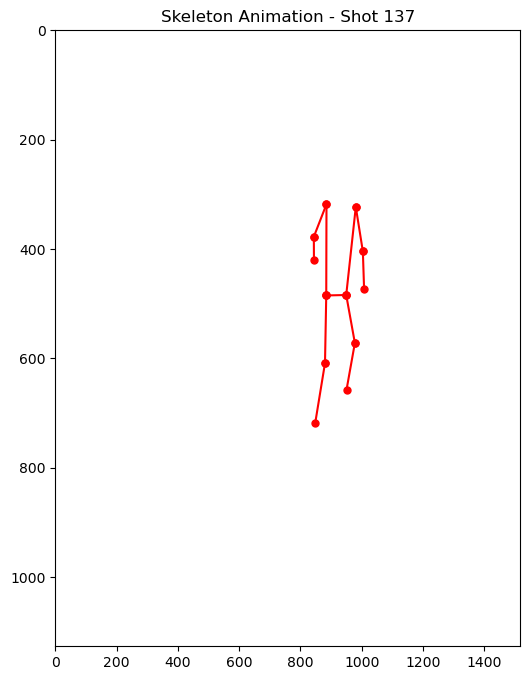

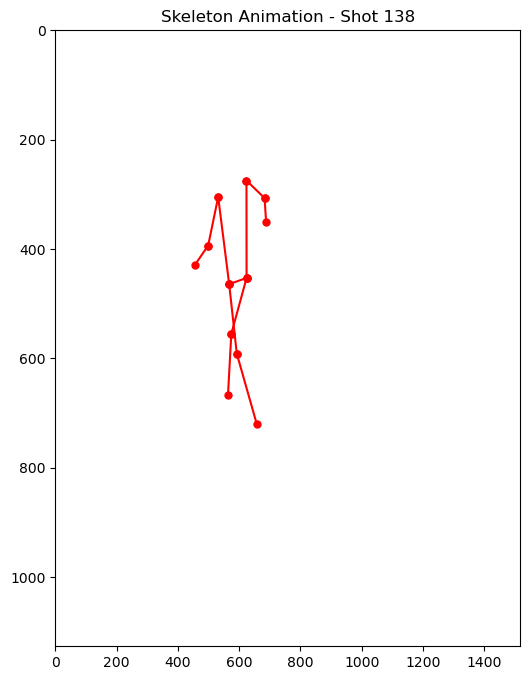

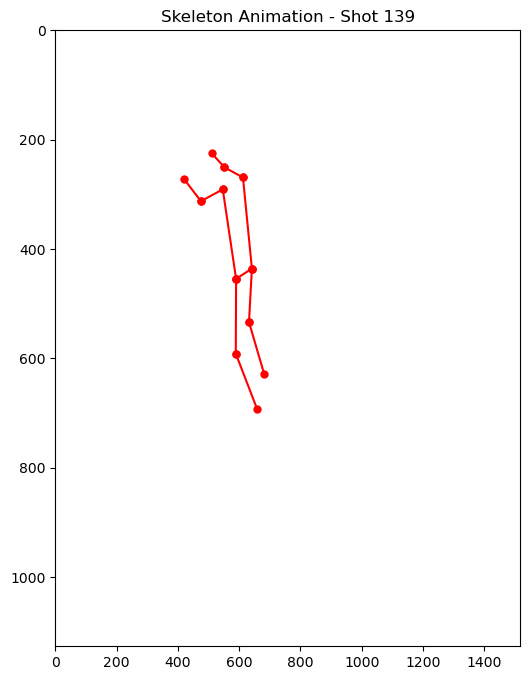

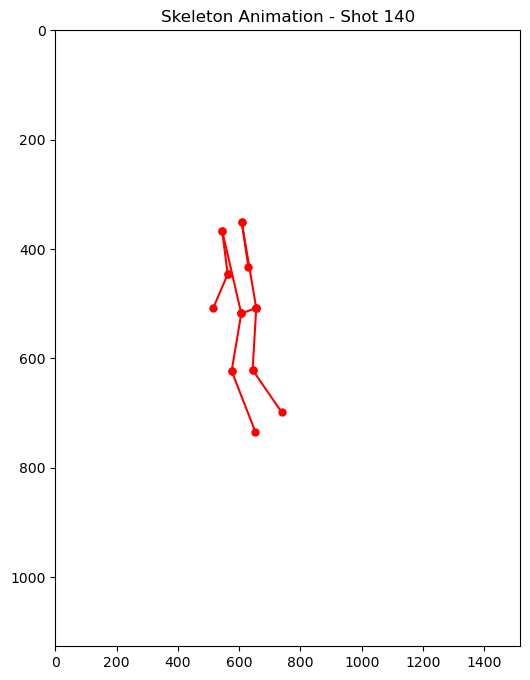

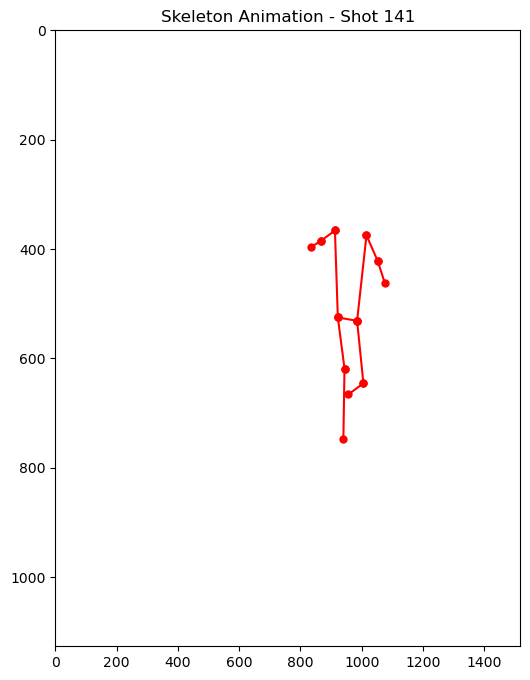

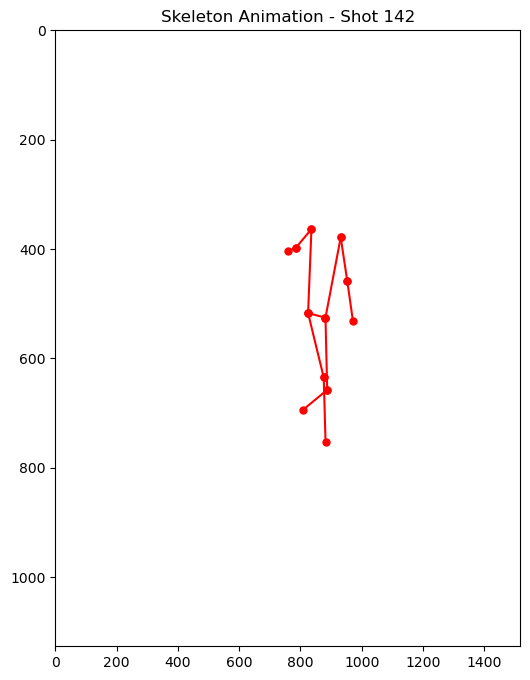

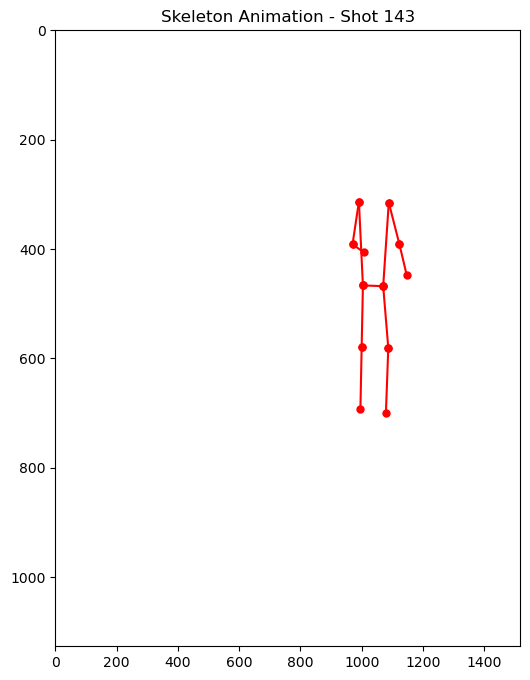

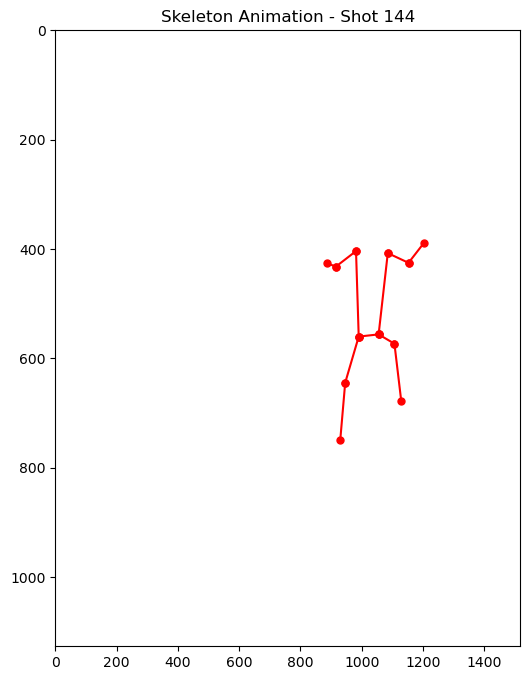

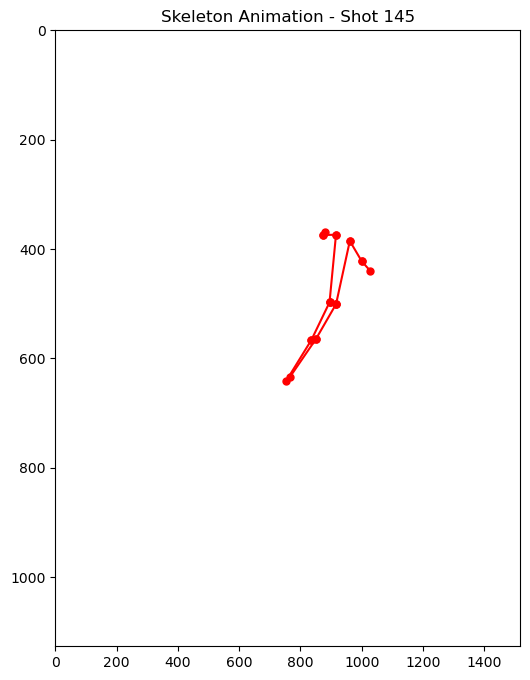

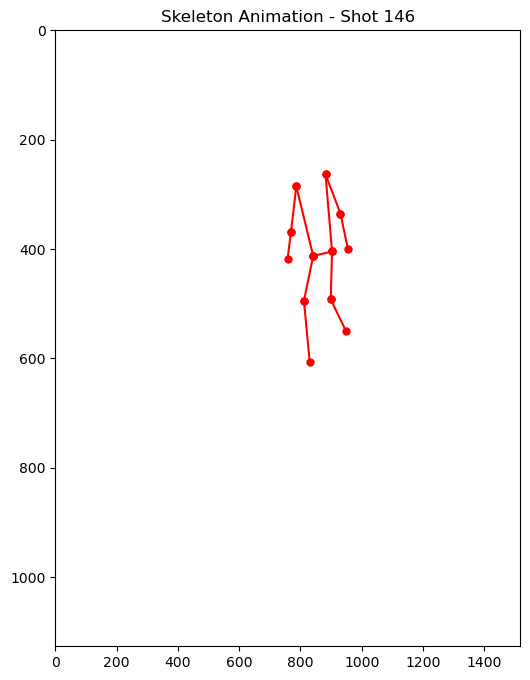

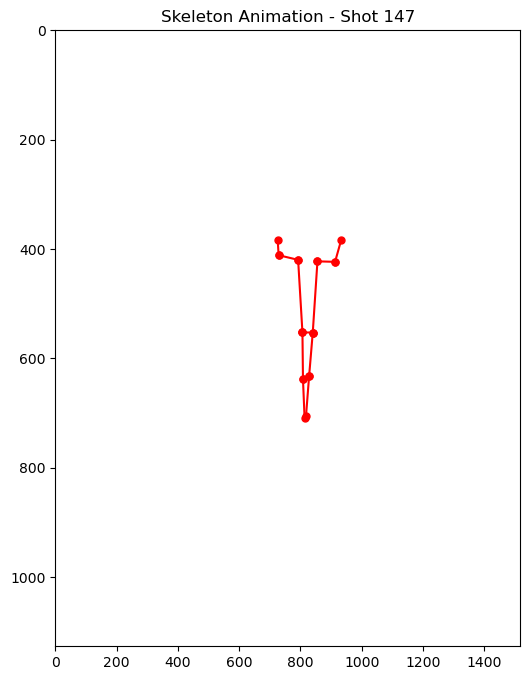

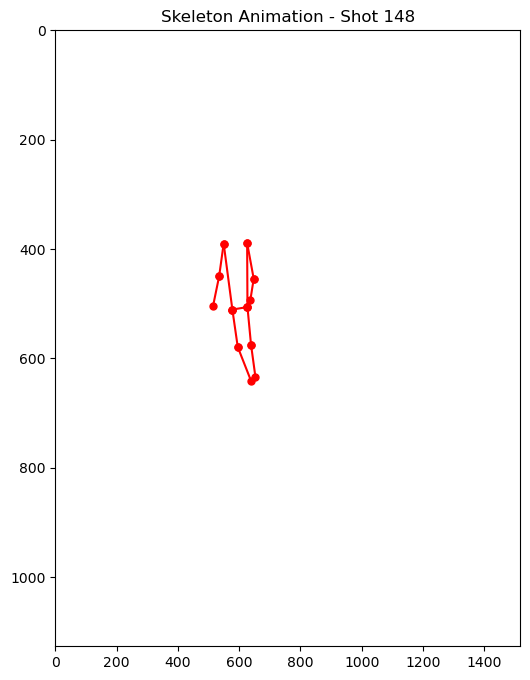

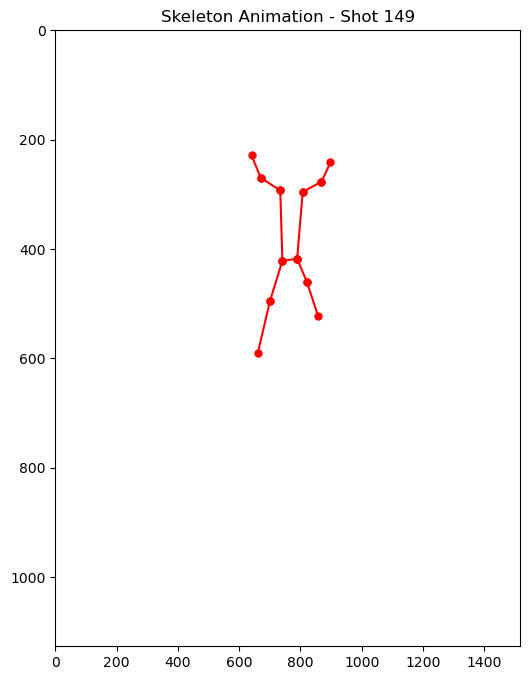

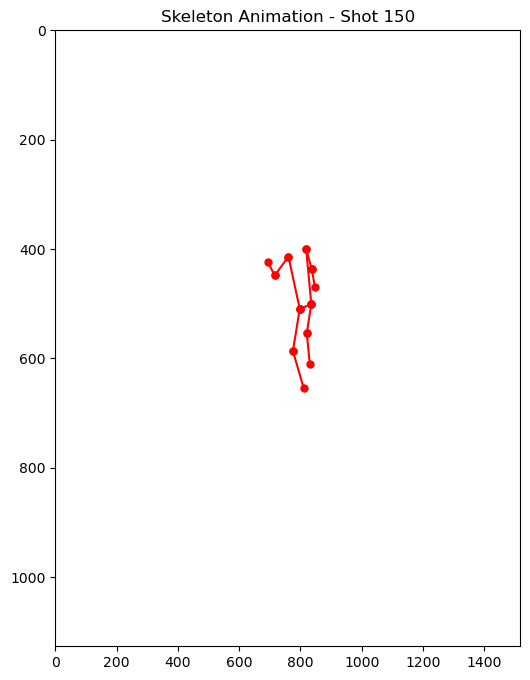

In [9]:
# Choose the shot you want to animate

shot_id = 101

while shot_id in df['id'].values:
    
    shot_df = df[df['id'] == shot_id].reset_index(drop=True)

    # Skeleton connections (COCO style)
    skeleton = [
        (0,1),(0,2),(1,3),(2,4),
        (0,5),(0,6),(5,7),(7,9),(6,8),(8,10),
        (5,11),(6,12),(11,12),(11,13),(13,15),
        (12,14),(14,16)
    ]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(6,8))
    lines = []
    for _ in skeleton:
        line, = ax.plot([], [], 'ro-', markersize=5)
        lines.append(line)

    ax.set_xlim(0, df[[f'kpt_{i}_x' for i in range(17)]].max().max() + 50)
    ax.set_ylim(0, df[[f'kpt_{i}_y' for i in range(17)]].max().max() + 50)
    ax.invert_yaxis()
    ax.set_title(f"Skeleton Animation - Shot {shot_id}")

    # Animation function
    def update(frame):
        row = shot_df.iloc[frame]
        keypoints = [(row[f'kpt_{i}_x'], row[f'kpt_{i}_y']) for i in range(17)]

        for idx, (a,b) in enumerate(skeleton):
            if keypoints[a][0] != 0 and keypoints[a][1] != 0 and keypoints[b][0] != 0 and keypoints[b][1] != 0:
                lines[idx].set_data([keypoints[a][0], keypoints[b][0]],
                                    [keypoints[a][1], keypoints[b][1]])
            else:
                lines[idx].set_data([], [])
        return lines

    # Create animation
    anim = FuncAnimation(fig, update, frames=len(shot_df), interval=200, blit=True)

    # plt.show()

    # Save animation 
    anim.save(f'badminton_shot_{shot_id}.gif', writer='pillow')

    shot_id += 1

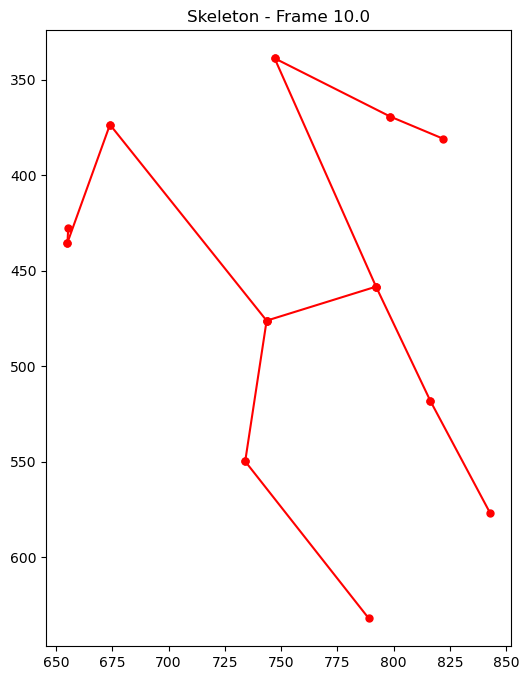

In [16]:
# Example: pick the first row of df
row = df.iloc[10]

# Extract keypoints
keypoints = []
for i in range(17):  # kpt_0 to kpt_16
    x = row[f'kpt_{i}_x']
    y = row[f'kpt_{i}_y']
    keypoints.append((x, y))

# Skeleton connections (COCO style)
skeleton = [
    (0,1),(0,2),(1,3),(2,4),
    (0,5),(0,6),(5,7),(7,9),(6,8),(8,10),
    (5,11),(6,12),(11,12),(11,13),(13,15),
    (12,14),(14,16)
]

# Plot
plt.figure(figsize=(6,8))
for a,b in skeleton:
    if keypoints[a][0] != 0 and keypoints[a][1] != 0 and keypoints[b][0] != 0 and keypoints[b][1] != 0:
        x_vals = [keypoints[a][0], keypoints[b][0]]
        y_vals = [keypoints[a][1], keypoints[b][1]]
        plt.plot(x_vals, y_vals, 'ro-', markersize=5)

plt.gca().invert_yaxis()  # Match image coordinates
plt.title(f"Skeleton - Frame {row['frame_count']}")
plt.show()